In [ ]:
# loading the database ...

In [2]:
import pandas as pd
import numpy as np

In [5]:
example = pd.DataFrame([['actor1',"30/10/2024", 500, 'scenario1', 'equity', 5],
                        ['actor2',"20/10/2024", 100, 'scenario3', 'equity', 0],
                        ['actor3',"21/10/2024", 5200, 'scenario1', 'options', 0],
                        ['actor4',"22/10/2024", 400, 'scenario2', 'FI', 1]], columns = ["Actor_id", "date", "number of trades", "scenario traded", "asset", "num. alerts raised"])
example
#example of the database

,Actor_id,date,number of trades,scenario traded,asset,num. alerts raised
0,actor1,30/10/2024,500,scenario1,equity,5
1,actor2,20/10/2024,100,scenario3,equity,0
2,actor3,21/10/2024,5200,scenario1,options,0
3,actor4,22/10/2024,400,scenario2,FI,1


# set up the autoencoder

In [16]:
import tensorflow as tf 
from tensorflow.keras import Model, regularizers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
def Autoencoder_settings(input_shape, encoding_dim, activation, regularization):
    # Define the input layer
    input_layer = Input(shape=(input_shape, ))
    # Define the encoder Layers
    encoder_layer1 = Dense(input_shape, activation=activation, kernel_regularizer=regularizers.l1(regularization)) (input_layer)
    encoder_layer2 = Dense(encoding_dim, activation=activation) (encoder_layer1)
    encoder_layer3 = Dense(int(encoding_dim/2), activation=activation, kernel_regularizer=regularizers.l2(regularization)) (encoder_layer2)
    # Define the decoder Layers
    decoder_layer1 = Dense(int(encoding_dim/2), activation=activation) (encoder_layer3)
    decoder_layer2 = Dense(encoding_dim, activation=activation) (decoder_layer1)
    decoder_layer3 = Dense (input_shape, activation=activation) (decoder_layer2)
    # Create the autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoder_layer3)
    encoder_m = Model(inputs=input_layer, outputs=encoder_layer3)
    return autoencoder, encoder_m


In [17]:
test_encoder, _ =  Autoencoder_settings(498, 16, "relu", 0.001)
test_encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 498)]             0         
_________________________________________________________________
dense (Dense)                (None, 498)               248502    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                7984      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 498)               8466  

In [ ]:
# apply bayes Optimization to identify the best parameters for the autoencoder

In [ ]:
space = {
'encoding_dim': hp.quniform('encoding_dim', 16, int(train_x-shape[1]/2), 1),
'Ir': hp.uniform('lr', le-6, le-2),
"weight_decay": hp.uniform('weight_decay', le-5, 1e-1),
'num_epochs': hp.quniform('num_epochs', 50, 150, 1),
'batch_size': hp.quniform('batch_size', 32, 256, 1),
'activation': hp. choice('activation', ["relu", "tanh", "sigmoid"]),
'optimizer': hp.choice('optimizer',["adam", "sgd", "rms"]),
"loss_function": hp. Choice( 'loss_function', ['mse'])
}

def objective(space):
    encoding_dim = int(space['encoding_dim'])
    activation_name = space[ 'activation']
    weight_decay = space[ 'weight_decay']
    autoencoder, _ = Autoencoder_settings(train_x.shape[1], encoding_dim, activation_name, weight_decay)
    print (autoencoder. summary())
    print ("\n")
    Ir = space['lr']
    loss_function = space['loss_function"]
    optimizer_function ={'adam': Adam(learning_rate=lr), 'sgd': SGD(learning_rate=lr), 'rms': RMSprop(lr = 1lr)}
                          
    optimizer = optimizer_function[space[ 'optimizer']]
    autoencoder.compile(metrics = ['mse'], loss= loss_function, optimizer=optimizer)
    num_epochs = int(space["num_epochs"])
    batch_size = int(space[ 'batch_size'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
                          
    tb = TensorBoard(log_dir='./logs' ,
        histogram_freq=0, write_graph=True, write images=True)
                          
    history = autoencoder.fit(train_x, train_x, epochs=num_epochs, batch_size=batch_size,
        shuffle=True, verbose=0, validation_data=(test_x, test_x), callbacks=[early_stopping, tb])
    best_val_loss = np.min(history.history['val_loss'])
    print ("SCORE:", best_val_loss)
    return { 'loss': best_val_loss,'status': STATUS_OK}



In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective, space =space, algo = tpe.suggest, max_evals = 200, trials = trials)

choices = {
    'activation':['relu','tanh','sigmoid']
    'optimizer': ['adam','sgd','rms']
    'loss_function':['mse'] }

tuned_param = {}
for param in best_hyperparams:
    if param in choices.keys():
        tuned_param[param] = choices[param][best_hyperparams[param]]
    else:
        tuned_param[param] = best_hyperparams[param]
tuned_param

In [ ]:
{'activation':'relu', 'batch_size': 181.0, 'encoding_dim': 134.0, 'loss_function':'mse', 
 'lr': 0.0040588835776837855, 'num_epochs': 89.0, 'optimizer': 'rms', 'weight_decay': 3.1711647986993e-05}

In [ ]:
#retrain the model with the tuned parameters ...

In [ ]:
# PREDICT THE RECONSTRUCTION ERROR TO SPOT POTENTIAL ANOMALIES

In [ ]:
autoencoder = load_model('modelpath')
# COMPUTE RECONSTRUCTION ERROR MATRIX on all samples
X_standard = shapdf.copy(deep=True)
X_reconstruction = autoencoder.predict(X_standard.values)
X_reconstruction = pd.DataFrame(X_reconstruction)
X_reconstruction.columns = X_standard.columns
X_reconstruction-index = X_standard.index
rec_err = np.linalg.norm(X_standard - X_reconstruction, axis = 1)
X_standard['error'] = rec_err


In [19]:
#example of a prediction value
X_standard.iloc[0]['error']

130.056


In [ ]:
#EXPLAIN THE RECONSTRUCTION ERROR VIA SHAP VALUES

In [ ]:
# set up SHAP model
background = X_standard.values[np.random.choice(X_standard.shape[0], 600, replace=False)]
explainer_autoencoder = shap.DeepExplainer(autoencoder, background)

In [ ]:
X_standard[ 'key'] = X_standard.index
#SET UP THE UDF
# convert pandas dataframe to pyspark dataframe
pandas_df = X_standard.to_dict(orient= 'records' )
columns_for_shap_calculation = X_standard.columns
return_schema = StructType()
for feature in columns_for_shap_calculation:
    return_schema = return_schema.add(StructField(feature, FloatType() ))
    
return_schema = return_schema.add(StructField('shap_results', StringType()))
spark_df = spark.createDataFrame(pandas_df)

In [ ]:
def calculate_shap(iterator):
    #Load the explainer
    explainer_autoencoder  = shap.DeepExplainer (autoencoder, background)
    #for each batch
    for pdf in iterator:
    #compute shap values on the batch
        temp = pdf.drop("key" ,axis=1). values
        shapv = explainer_autoencoder.shap_values(temp)
        #for each observation in the batch
        for i, X in pdf.iterrows ():
            #store the index for mapping purposes
            idx = X[' key']
            #Load reconstruction error of this observation
            reconstructed_sample = pd.DataFrame(X_reconstruction.loc[idx])
            reconstructed_sample.columns = ['Reconstruction error']
            
            #identify top 5 features representing the reconstruction error
            reconstructed_sample_abs = reconstructed_sample.apply(lambda x: np.abs(x))
            reconstructed_sample_abs = reconstructed_sample_abs.sort_values("Reconstruction_error", ascending = False)
            top_5_features_error = reconstructed_sample.loc[reconstructed_sample_abs.index, : ]
            top_5_features_error = top_5_features error.iloc[0:5]
            
            SHAP_top_5_features_error = pd.DataFrame()
            # for each feature of the top 5 extract the related shap values
            for featurename in top_5_features_error.index:
                feature index = list(reconstructed_sample.index).index(featurename)
                shap_values = shapv[feature_index][i]
                SHAP_top_5_features error[str(featurename)] = pd.Series(shap_values.reshape(-1))
                SHAP_top_5_features error.index = reconstructed_sample.index
                # identify contributing and offsetting features
                top_5_features_error[ 'contributing' ] = (top_5_features_error[ 'Reconstruction error'] › 0).astype(int)
            for j in range(top_5_features error.shape[0]):
                if top_5_features_error [ 'contributing' ][j] == 0:
                        SHAP_top_5_features_error[top_5_features_error.index[jl] *= -1
                                    
            #Aggregate shap values across features to get 1 single value
            results = SHAP_top_5_features_error-median(axis=1).tolist()
            results_dict = {X_reconstruction.columns[i]: results[i] for i in range(len(results))}
            #store the results as json
            shap_results = json.dumps(results_dict)
            X['shap_results'] = shap_results
            yield X.to_frame().T
                                            

In [ ]:
result_df = spark_df.mapInPandas(calculate_shap_t, schema=return_schema)

In [ ]:
# plot results

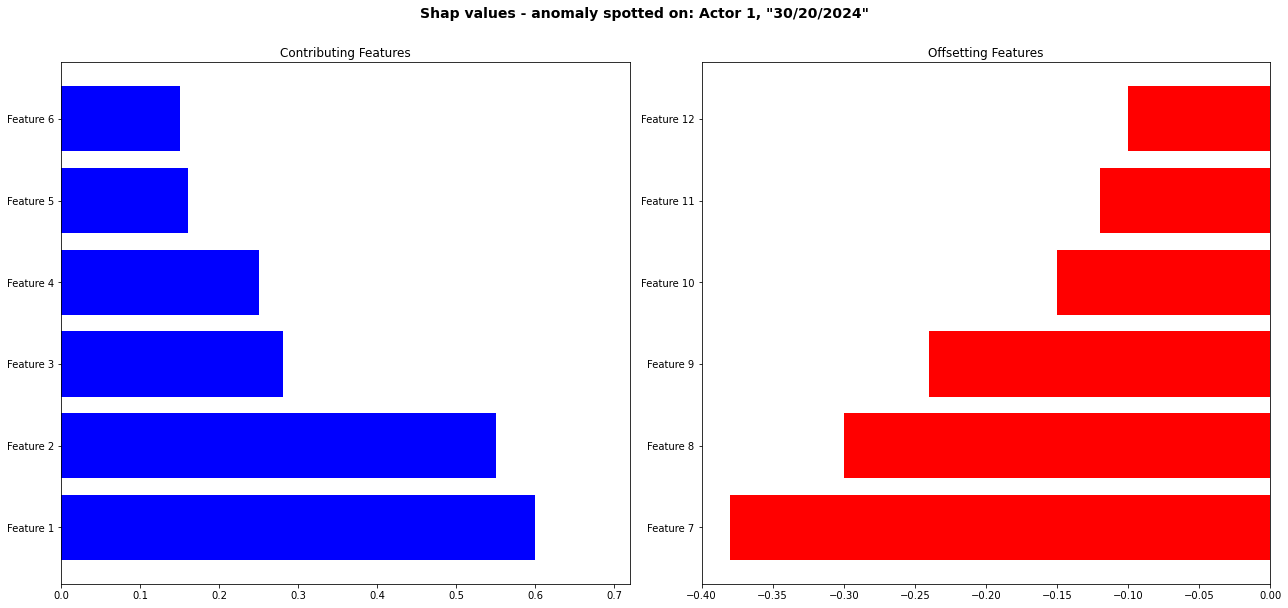

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Feature sample names
contributing_features = [f'Feature {i}' for i in range(1, 7)]
offsetting_features = [f'Feature {i}' for i in range(7, 13)]

# SHAP values for contributing and offsetting features
contributing_values = np.array([0.6, 0.55, 0.28, 0.25, 0.16, 0.15])
offsetting_values = np.array([-0.38, -0.30, -0.24, -0.15, -0.12, -0.1])  

fig, axes = plt.subplots(ncols=2, figsize=(18, 8))
fig.suptitle('Shap values - anomaly spotted on: Actor 1, "30/20/2024"',y=1.05, fontsize=14, fontweight='bold')


# features contributing to the anomaly (blue bars)
axes[0].barh(contributing_features, contributing_values, color='blue')
axes[0].set_title("Contributing Features")
axes[0].set_xlim(0, max(contributing_values) * 1.2)

# features offsetting the anomaly (red bars)
axes[1].barh(offsetting_features, offsetting_values, color='red')
axes[1].set_title("Offsetting Features")
axes[1].set_xlim(-0.4, 0)

plt.tight_layout()
plt.show()